# EO-HARVEST
## Demonstration with PEPS Service

PEPS is the CNES platform giving access to Sentinel-1, Sentinel-2 and Sentinel-3 products (https://peps.cnes.fr). It does not require any account.

In [1]:
# import eo-harvest package
import eo_harvest

# and other stuff
import datetime
import shapely.geometry


## Simple search
Searching granules for a dataset using time and space criteria. Let's search for instance *Sentinel-1* collection, whose id is `S1`. More selection keywords can be added to ``search_granule``, following the list provided in PEPS API (refer to https://peps.cnes.fr/rocket/plus/img/PEPS-IF-0-0170-ATOS_01_00_[2].pdf). Here we select the specific product type ``SLC`` with ``productType`` keyword.

In [3]:
# define search area as shapely geometry (here a simple rectangular box)
area = shapely.geometry.box(-50, -20, -20, 20)

# define search time frame
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 1, 2)

# performs the search
# first args is the data store, here `Wekeo`
res = eo_harvest.search_granule(
    'PEPS',
    'S1',
    start,
    end,
    area,
    productType='SLC'
)


## Inspecting the result

We get in ``res`` variable the list of granules, with their properties, that were returned by the query.  A few operations can be done on these results.


### Display result footprints

It is possible to display the location of these found granules using ``plot`` function:

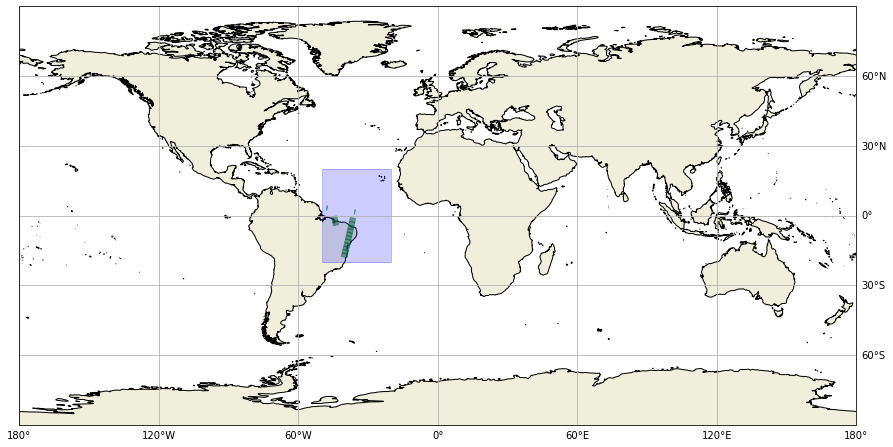

In [4]:
# display the location of found granules
eo_harvest.plot(res, clip=area)

### Description of the returned granules

The properties of the returned granules can be inspected, just printing the returned granule objects:

In [5]:
# display the details of the first granule in the returned list
print(res.items[0])

S1B_IW_SLC__1SDV_20200101T211620_20200101T211655_019628_02518F_9C3F
   start: 2020-01-01 21:16:20.294000+00:00
   end: 2020-01-01 21:16:55.637000+00:00
   bounding box: POLYGON ((-45.715786 -2.71993, -43.050335 -2.71993, -43.050335 -0.105917, -45.715786 -0.105917, -45.715786 -2.71993))
   footprint: POLYGON ((-45.26405 -2.71993, -43.050335 -2.236153, -43.504875 -0.105917, -45.715786 -0.582701, -45.26405 -2.71993))
   url: https://peps.cnes.fr/resto/collections/S1/fd4d8637-c2a9-53fb-bb9c-808870dce757/download
   quicklook: https://peps.cnes.fr/quicklook/2020/01/01/S1B/S1B_IW_SLC__1SDV_20200101T211620_20200101T211655_019628_02518F_9C3F_quicklook.jpg




In [6]:
# print the name and URL of all found granules
for c in res.items:
    print(c.name, c.url)

S1B_IW_SLC__1SDV_20200101T211620_20200101T211655_019628_02518F_9C3F https://peps.cnes.fr/resto/collections/S1/fd4d8637-c2a9-53fb-bb9c-808870dce757/download
S1B_IW_SLC__1SDV_20200101T211552_20200101T211622_019628_02518F_F4DA https://peps.cnes.fr/resto/collections/S1/4758db7a-a955-5495-ac7f-effe5e39cb07/download
S1B_WV_SLC__1SSV_20200101T084118_20200101T085614_019621_025158_628C https://peps.cnes.fr/resto/collections/S1/9cfaf937-95b6-5f88-ac7a-f875b79ff17c/download
S1A_IW_SLC__1SDV_20200101T081243_20200101T081308_030604_038194_362D https://peps.cnes.fr/resto/collections/S1/0c0be263-0948-5c0f-a975-b96cc962307b/download
S1A_IW_SLC__1SDV_20200101T081218_20200101T081245_030604_038194_AE97 https://peps.cnes.fr/resto/collections/S1/61fed235-1101-5fef-a14b-81b62706e076/download
S1A_IW_SLC__1SDV_20200101T081153_20200101T081220_030604_038194_0EB8 https://peps.cnes.fr/resto/collections/S1/454e231f-0c5c-5370-ba78-c169f3ee738f/download
S1A_IW_SLC__1SDV_20200101T081128_20200101T081155_030604_038194_8

**Quicklook**

PEPS returns also a link to a quicklook image for each collected granule. It can be downloaded and displayed as follow:

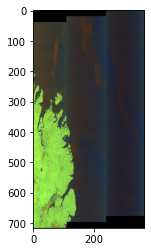

In [7]:
import IPython.display as disp

res.items[0].display_quicklook()


In [ ]:
res.items[0].download(mystore='.', silent=False)

Downloading: https://peps.cnes.fr/resto/collections/S1/fd4d8637-c2a9-53fb-bb9c-808870dce757/download to PEPS/S1/2020/001/S1B_IW_SLC__1SDV_20200101T211620_20200101T211655_019628_02518F_9C3F


## Advanced usage: multi-search
Let's search crossovers over a storm track for instance, e.g. a series of time and locations. The `multisearch` function allows to pass on the full list of time and locations, and harvest a consolidate result.

This step may takes a long time here, as we send a search request for each storm track time step (every hour), so more than 200 requests for the whole storm life time.

In [8]:
# WARNING: this example requires to install certoolbox: https://gitlab.ifremer.fr/jp0540d/certoolbox 
import certoolbox.hurricanes

# first get a storm track from our storm track directory
# identifier of the storm in ATCF convention
ATCF_NAME = 'wp202019'

# read the track
track = certoolbox.hurricanes.track(ATCF_NAME)

# transform into a list of time and search areas, using a colocation radius of 0.5 degrees (to ensure we are close to storm eye).
# The track is interpolated hourly for better precision and we will search within 30 minutes around each hourly track point.
targets = certoolbox.hurricanes.searchable_track(track, radius=0.5, interpolate='1H')

Run the multi-search (may take some time) and display result

In [9]:
res = eo_harvest.multisearch(
    'PEPS',
    'S1',
    targets,
    delta_time=datetime.timedelta(minutes=30),
    productType='SLC'
)

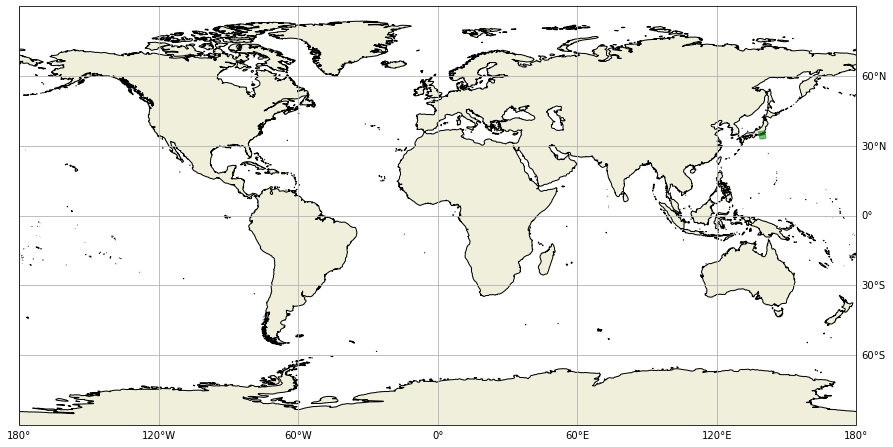

In [10]:
eo_harvest.plot(res)